In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

df = pd.read_excel ("UBER_DRIVES_2016_DATA.xlsx")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [2]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-06-01 17:15:00,2016-06-01 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-06-01 17:30:00,2016-06-01 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-07-01 13:27:00,2016-07-01 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-10-01 08:05:00,2016-10-01 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-10-01 12:17:00,2016-10-01 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [3]:
df.tail(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
df.shape

(1156, 7)

In [5]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [6]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [7]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df [ df["END_DATE"].isnull() ]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [9]:
df.drop ( df [ df["END_DATE"].isnull() ] .index , axis=0 , inplace=True )
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [10]:
df.shape

(1155, 7)

In [11]:
df.info()
"THE INFORMATION OF DATASET"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


'THE INFORMATION OF DATASET'

In [12]:
df.drop ( ["PURPOSE"] , axis=1 , inplace=True )
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
dtype: int64

In [13]:
df.shape

(1155, 6)

In [14]:
df [ df.duplicated() ]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [15]:
df.drop ( df [ df.duplicated() ] .index , axis=0 , inplace=True )
df.shape

(1154, 6)

In [16]:
df["START_DATE"] = pd.to_datetime ( df["START_DATE"] , infer_datetime_format = True , format = "%m/%d/%Y %H:%M" )
df["END_DATE"] = pd.to_datetime ( df["END_DATE"] , infer_datetime_format = True , format = "%m/%d/%Y %H:%M" )
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
dtype: object

In [17]:
df["CATEGORY"].unique()

array(['Business', 'Personal'], dtype=object)

In [18]:
df.groupby ("CATEGORY")

In [19]:
df.groupby ("CATEGORY") ["MILES"]

In [20]:
df.groupby ("CATEGORY") ["MILES"] .sum()

CATEGORY
Business    11477.1
Personal      717.7
Name: MILES, dtype: float64

Text(0.5, 1.0, 'TOTAL MILES BY CATEGORY')

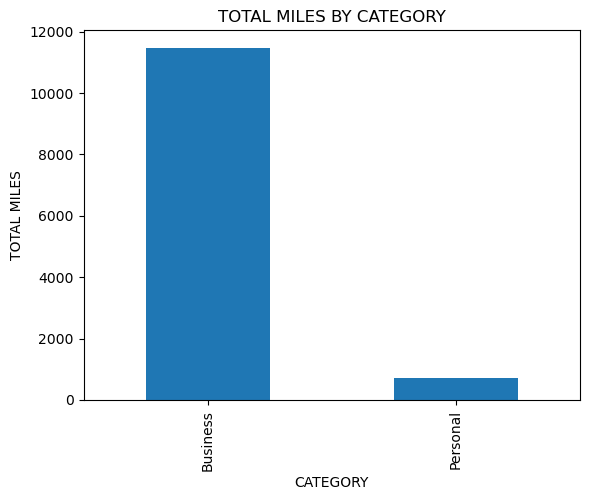

In [21]:
df.groupby ("CATEGORY") ["MILES"] .sum() .plot ( kind="bar" )
plt.xlabel ("CATEGORY")
plt.ylabel ("TOTAL MILES")
plt.title ("TOTAL MILES BY CATEGORY")

In [22]:
df["START"].nunique()

177

In [23]:
df["START"].value_counts ( ascending=False )

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [24]:
df["START"].value_counts ( ascending=False ) .head(10)

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

Text(0.5, 1.0, 'TOP 10 PICKUP PLACES')

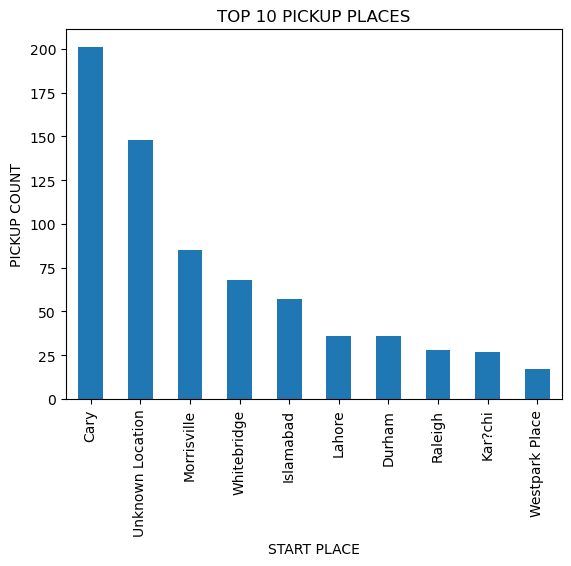

In [25]:
df["START"].value_counts ( ascending=False ) .head(10) .plot ( kind="bar" )
plt.xlabel ( "START PLACE" )
plt.ylabel ( "PICKUP COUNT" )
plt.title ( "TOP 10 PICKUP PLACES" )

Text(0.5, 1.0, 'TOP 10 PICKUP PLACES')

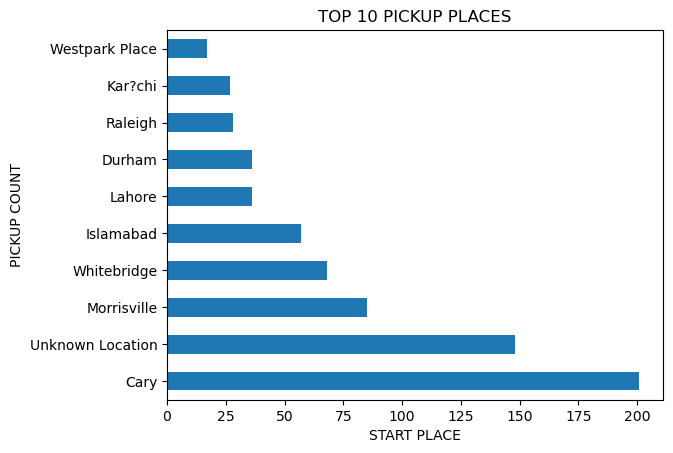

In [26]:
df["START"].value_counts ( ascending=False ) .head(10) .plot ( kind="barh" )
plt.xlabel ( "START PLACE" )
plt.ylabel ( "PICKUP COUNT" )
plt.title ( "TOP 10 PICKUP PLACES" )

In [27]:
df["STOP"].nunique()

188

In [28]:
df["STOP"].value_counts ( ascending=False )

Cary                 202
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

In [29]:
df["STOP"].value_counts ( ascending=False ) .head(10)

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

Text(0.5, 1.0, 'TOP 10 DROP PLACES')

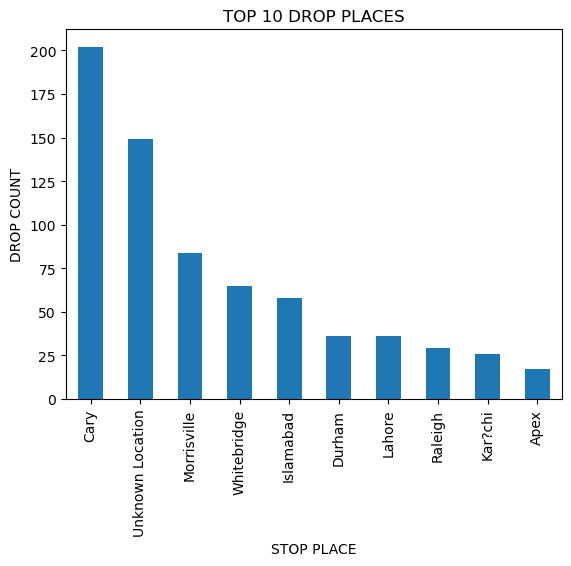

In [30]:
df["STOP"].value_counts ( ascending=False ) .head(10) .plot ( kind="bar" )
plt.xlabel ( "STOP PLACE" )
plt.ylabel ( "DROP COUNT" )
plt.title ( "TOP 10 DROP PLACES" )

Text(0.5, 1.0, 'TOP 10 DROP PLACES')

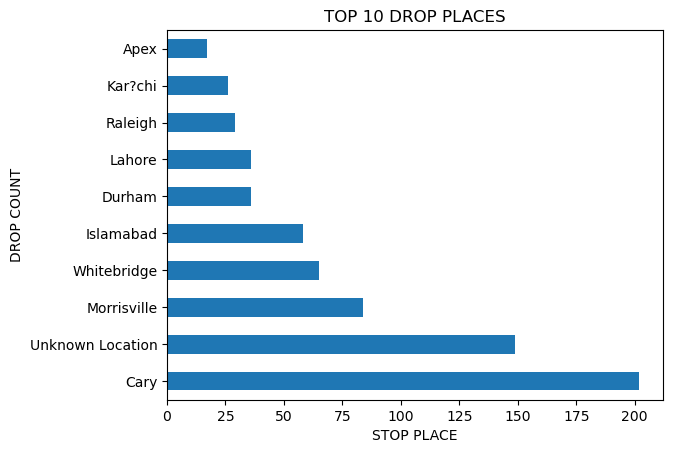

In [31]:
df["STOP"].value_counts ( ascending=False ) .head(10) .plot ( kind="barh" )
plt.xlabel ( "STOP PLACE" )
plt.ylabel ( "DROP COUNT" )
plt.title ( "TOP 10 DROP PLACES" )

In [32]:
df [ df["START"] == "Unknown Location"] .value_counts()

START_DATE           END_DATE             CATEGORY  START             STOP              MILES
2016-01-09 11:51:00  2016-01-09 12:24:00  Business  Unknown Location  Islamabad         13.0     1
2016-09-24 20:29:00  2016-09-24 20:33:00  Business  Unknown Location  Unknown Location  2.4      1
2016-09-27 21:01:00  2016-09-28 02:37:00  Business  Unknown Location  Unknown Location  195.6    1
2016-09-29 16:13:00  2016-09-29 18:47:00  Business  Unknown Location  Islamabad         12.6     1
2016-10-09 10:28:00  2016-10-09 10:45:00  Business  Unknown Location  Unknown Location  2.8      1
                                                                                                ..
2016-08-19 08:24:00  2016-08-19 08:45:00  Business  Unknown Location  Noorpur Shahan    7.6      1
2016-08-19 12:07:00  2016-08-19 12:24:00  Business  Unknown Location  Islamabad         5.7      1
2016-08-21 10:00:00  2016-08-21 10:29:00  Business  Unknown Location  Unknown Location  7.6      1
2016-08-21 14:0

In [33]:
df [ df["STOP"] == "Unknown Location"] .value_counts()

START_DATE           END_DATE             CATEGORY  START             STOP              MILES
2016-01-09 17:21:00  2016-01-09 17:36:00  Business  Islamabad         Unknown Location  10.6     1
2016-09-27 21:01:00  2016-09-28 02:37:00  Business  Unknown Location  Unknown Location  195.6    1
2016-09-30 20:59:00  2016-09-30 22:34:00  Business  Islamabad         Unknown Location  16.7     1
2016-10-09 10:28:00  2016-10-09 10:45:00  Business  Unknown Location  Unknown Location  2.8      1
2016-10-10 17:33:00  2016-10-10 18:13:00  Business  Islamabad         Unknown Location  9.5      1
                                                                                                ..
2016-08-21 14:05:00  2016-08-21 14:34:00  Business  Unknown Location  Unknown Location  7.7      1
2016-08-21 18:48:00  2016-08-21 19:24:00  Business  Islamabad         Unknown Location  20.2     1
2016-08-22 11:07:00  2016-08-22 11:23:00  Business  Islamabad         Unknown Location  6.3      1
2016-08-22 14:0

In [34]:
df [ df["START"] == "Unknown Location"] ["START"] .value_counts()

Unknown Location    148
Name: START, dtype: int64

In [35]:
df [ df["STOP"] == "Unknown Location"] ["STOP"] .value_counts()

Unknown Location    149
Name: STOP, dtype: int64

<Axes: xlabel='MILES', ylabel='Count'>

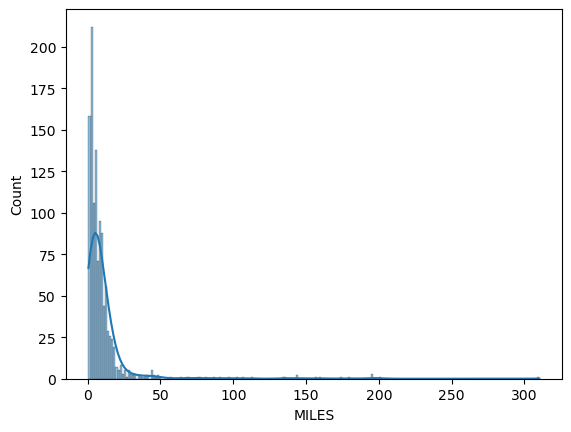

In [36]:
sns.histplot ( df["MILES"] , kde=True )

In [37]:
df.describe()

,MILES
count,1154.000000
mean,10.567418
std,21.588452
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


In [39]:
df.groupby ([ "START" , "STOP" ]) 

In [40]:
df.groupby ([ "START" , "STOP" ]) .sum()

C:\Users\ARPIT-MIMANI\AppData\Local\Temp\ipykernel_13292\2282329986.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby ( [ "START" , "STOP" ] ) .sum()


MILES
START         STOP                     
Agnew         Agnew                 2.2
              Cory                  4.3
              Renaissance           4.6
Almond        Bryson City          15.2
Apex          Apex                  4.3
...                                 ...
Whitebridge   Wayne Ridge          31.9
              Westpark Place       31.4
              Whitebridge          14.1
              Williamsburg Manor    8.3
Winston Salem Asheville           133.6

[363 rows x 1 columns]

In [41]:
df.groupby ([ "START" , "STOP" ]) ["MILES"] .sum()

START          STOP              
Agnew          Agnew                   2.2
               Cory                    4.3
               Renaissance             4.6
Almond         Bryson City            15.2
Apex           Apex                    4.3
                                     ...  
Whitebridge    Wayne Ridge            31.9
               Westpark Place         31.4
               Whitebridge            14.1
               Williamsburg Manor      8.3
Winston Salem  Asheville             133.6
Name: MILES, Length: 363, dtype: float64

In [42]:
df.groupby ( [ "START" , "STOP" ] ) ["MILES"] .sum() .sort_values ( ascending=False )

START             STOP            
Unknown Location  Unknown Location    1360.8
Morrisville       Cary                 395.7
Cary              Durham               390.0
                  Morrisville          380.0
Raleigh           Cary                 365.7
                                       ...  
Medical Centre    Tudor City             0.7
Sunnyside         Ingleside              0.7
Central           West Berkeley          0.6
Katunayaka        Katunayaka             0.5
Soho              Tribeca                0.5
Name: MILES, Length: 363, dtype: float64

In [43]:
df.groupby ( [ "START" , "STOP" ] ) ["MILES"] .sum() .sort_values ( ascending=False ) .head(10)

START             STOP            
Unknown Location  Unknown Location    1360.8
Morrisville       Cary                 395.7
Cary              Durham               390.0
                  Morrisville          380.0
Raleigh           Cary                 365.7
Cary              Raleigh              336.5
Durham            Cary                 324.5
Latta             Jacksonville         310.3
Islamabad         Unknown Location     267.0
Cary              Cary                 255.9
Name: MILES, dtype: float64

In [44]:
df.groupby ( [ "START" , "STOP" ] ) ["MILES"] .sum() .sort_values ( ascending=False ) [0:10]

START             STOP            
Unknown Location  Unknown Location    1360.8
Morrisville       Cary                 395.7
Cary              Durham               390.0
                  Morrisville          380.0
Raleigh           Cary                 365.7
Cary              Raleigh              336.5
Durham            Cary                 324.5
Latta             Jacksonville         310.3
Islamabad         Unknown Location     267.0
Cary              Cary                 255.9
Name: MILES, dtype: float64

In [45]:
df.groupby ( [ "START" , "STOP" ] ) ["MILES"] .sum() .sort_values ( ascending=False ) [1:11]

START             STOP            
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES, dtype: float64

<Axes: xlabel='ROUND_TRIP', ylabel='count'>

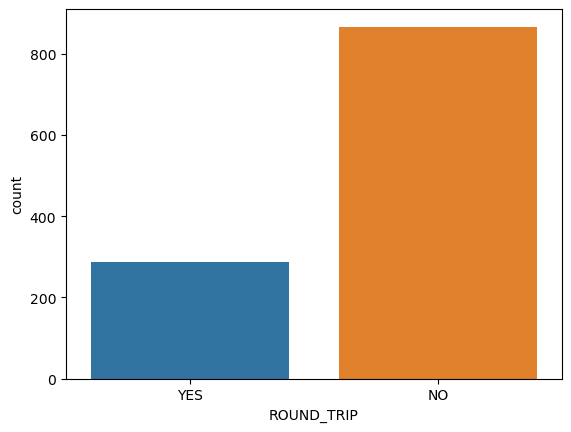

In [46]:
def is_round_trip (df) :
    if df["START"] == df["STOP"] :
        return "YES"
    else :
        return "NO"
df["ROUND_TRIP"] = df.apply ( is_round_trip , axis=1 )    
sns.countplot ( x="ROUND_TRIP" , data=df )

<Axes: xlabel='ROUND_TRIP', ylabel='count'>

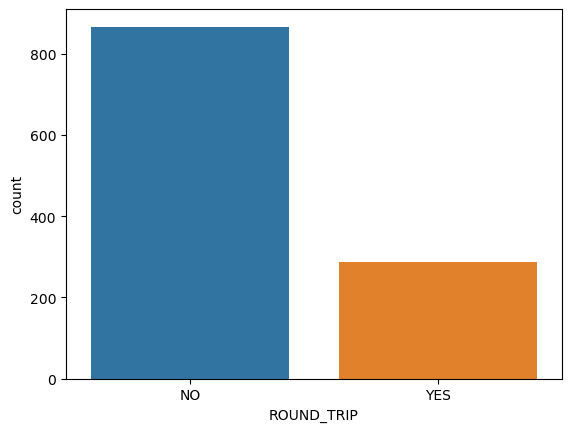

In [47]:
sns.countplot ( x="ROUND_TRIP" , data=df , order= df["ROUND_TRIP"].value_counts().index )

In [48]:
df["ROUND_TRIP"].value_counts()

NO     866
YES    288
Name: ROUND_TRIP, dtype: int64